#  Linear Regression on Advertising dataset

## Why do you use Regression Analysis?

Regression analysis estimates the relationship between two or more variables. 


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Let's take a look at some data, ask some questions about that data, and then use Linear regression to answer those questions.

In [3]:
# read data  from file and store into a DataFrame
data = pd.read_csv('C:/Users/kartdh/Desktop/Demo/Advertising.csv', index_col=0)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.columns = ['TV','Radio','Newspaper','Sales']

In [4]:
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
data.shape

(200, 4)

In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data.TV.mean(), data.Radio.mean(), data.Newspaper.mean(), data.TV.std()

(147.0425, 23.264000000000006, 30.553999999999995, 85.8542363149081)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [11]:
data.TV.kurtosis(), data.TV.skew()

(-1.2264948242299691, -0.06985336213274573)

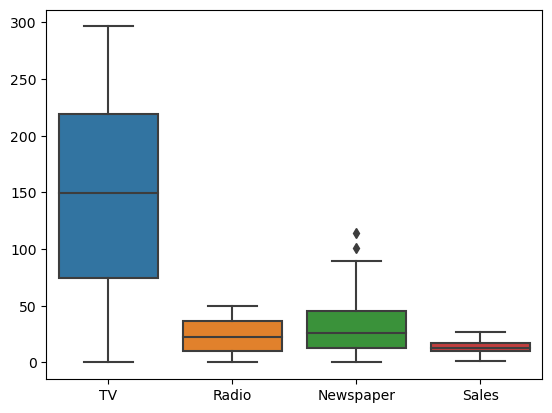

In [32]:
# Check for outliers using boxplots
sns.boxplot(data=data[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.show()

In [33]:
# Define a function to replace outliers with the median
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])

# Apply the function to each feature
for column in ['TV', 'Radio', 'Newspaper']:
    replace_outliers_with_median(data, column)

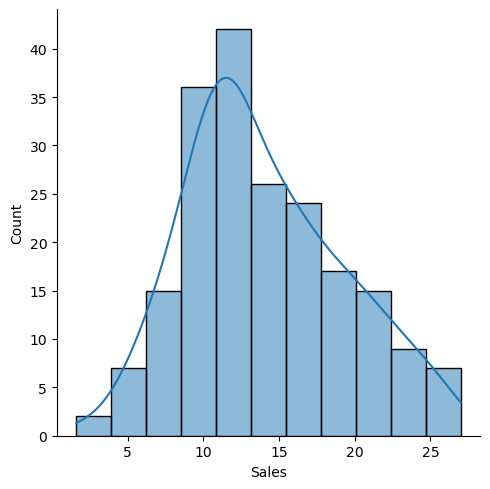

In [12]:
import seaborn as sns
sns.displot(data["Sales"], kde = True)

<Axes: xlabel='Newspaper', ylabel='Sales'>

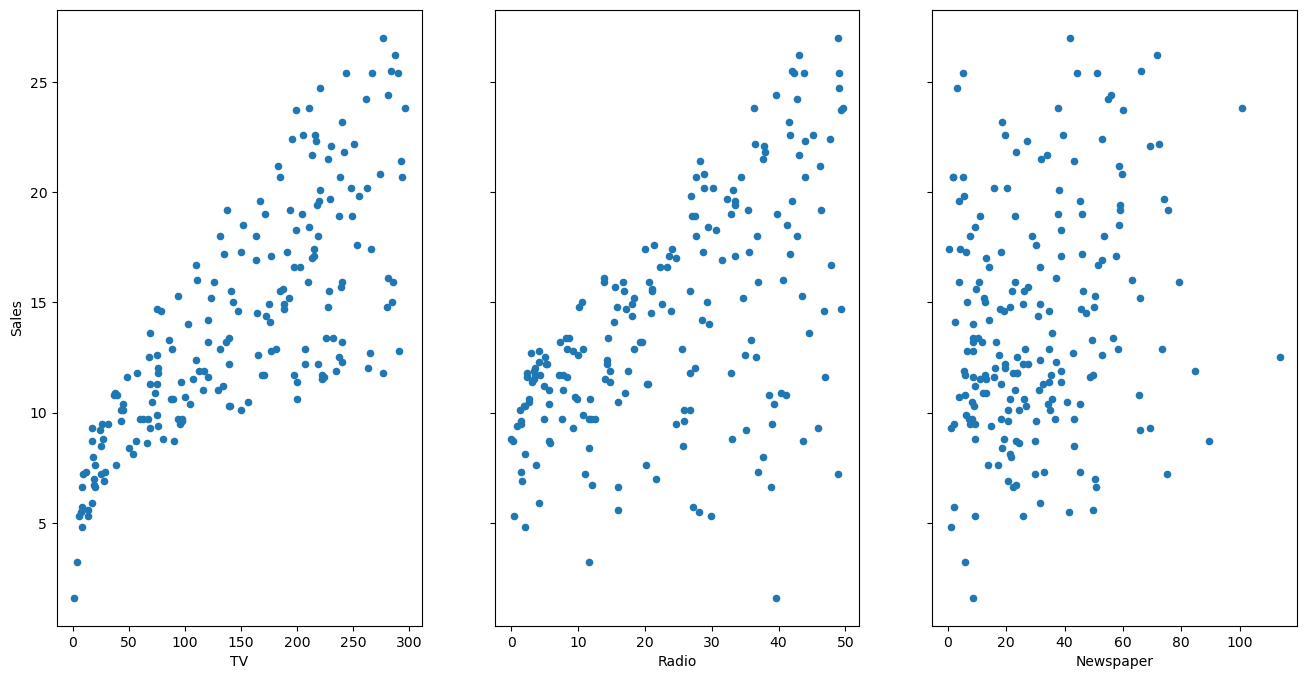

In [13]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [14]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.048462  0.782224
Radio      0.054809  1.000000   0.343141  0.576223
Newspaper  0.048462  0.343141   1.000000  0.215938
Sales      0.782224  0.576223   0.215938  1.000000


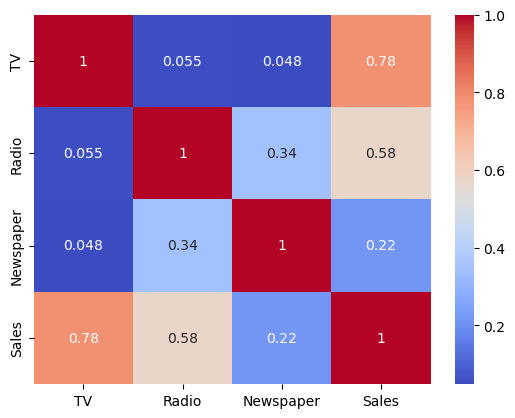

In [34]:
# Correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix)

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [35]:
# Define features and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [41]:
# Predict on the training set
y_train_pred = model.predict(X_train)


In [42]:
# Predict on the test set
y_test_pred = model.predict(X_test)


In [43]:
# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')


Training Mean Squared Error: 2.7063383304783435
Training R-squared: 0.8956542163775278
Test Mean Squared Error: 3.1581240391626855
Test R-squared: 0.8999440917857243


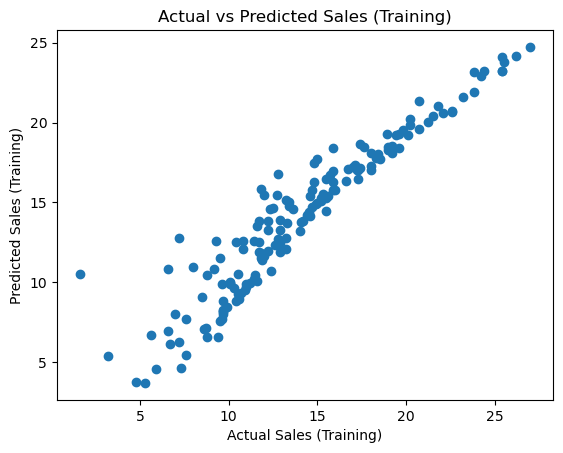

In [44]:
# Plot actual vs predicted sales for training data
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Sales (Training)')
plt.ylabel('Predicted Sales (Training)')
plt.title('Actual vs Predicted Sales (Training)')
plt.show()


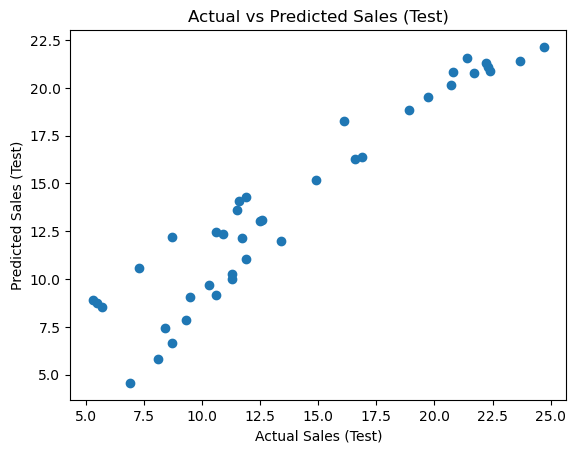

In [45]:
# Plot actual vs predicted sales for test data
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Sales (Test)')
plt.ylabel('Predicted Sales (Test)')
plt.title('Actual vs Predicted Sales (Test)')
plt.show()


In [46]:

# Determine overfitting or underfitting
if train_mse < test_mse and train_r2 > test_r2:
    print("The model is likely overfitting.")
elif train_mse > test_mse and train_r2 < test_r2:
    print("The model is likely underfitting.")
else:
    print("The model is performing well, without clear signs of overfitting or underfitting.")


The model is performing well, without clear signs of overfitting or underfitting.


In [39]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.1581240391626855
R-squared: 0.8999440917857243


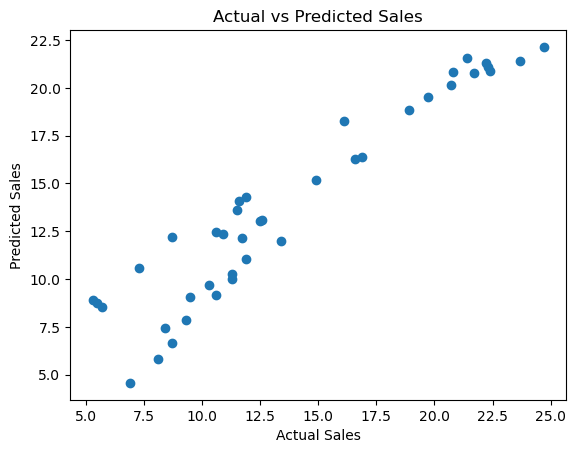

In [40]:
# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

## Questions About the Advertising Data

On the basis of this data, how should you spend advertising money in the future?
These general questions might lead you to more specific questions:

1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending, can sales be predicted?

Exploring these questions below.

In [24]:
# import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

Thus, you would predict Sales of **9,409 widgets** in that market.

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [49]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


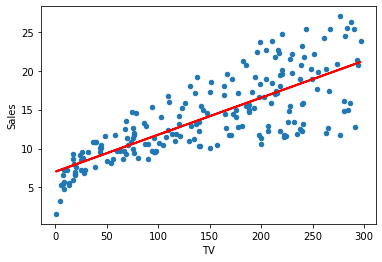

In [32]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(np.array(X), np.array(preds), c='red', linewidth=2)

# Try Multiple Linear Regression

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$



In [21]:
X = data[[ "TV", "Radio", "Newspaper"  ]]
y = data["Sales"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 183)

In [26]:
X_train

,TV,Radio,Newspaper
35,95.7,1.4,7.4
107,25.0,11.0,29.7
94,250.9,36.5,72.3
132,265.2,2.9,43.0
53,216.4,41.7,39.6
...,...,...,...
45,25.1,25.7,43.3
117,139.2,14.3,25.6
134,219.8,33.5,45.1
130,59.6,12.0,43.1


In [24]:
X_test


,TV,Radio,Newspaper
155,187.8,21.1,9.5
159,11.7,36.9,45.2
50,66.9,11.7,36.8
101,222.4,4.3,49.8
60,210.7,29.5,9.3
1,230.1,37.8,69.2
77,27.5,1.6,20.7
90,109.8,47.8,51.4
59,210.8,49.6,37.7
70,216.8,43.9,27.2


In [87]:
# build, predict, errors 

In [25]:
LR_Model = LinearRegression()
LR_Model.fit(   X_train, y_train   )
LR_Model.intercept_, LR_Model.coef_

(3.1418278006687146, array([0.04395612, 0.19012789, 0.00096319]))

In [27]:
y_train_preds  = LR_Model.predict(  X_train )

In [28]:
y_test_preds = LR_Model.predict( X_test)

In [29]:
mean_absolute_error(y_train, y_train_preds) ,mean_absolute_error(y_test, y_test_preds) 

mean_absolute_percentage_error(y_train, y_train_preds), mean_absolute_percentage_error(y_test, y_test_preds)

(0.10839081131084986, 0.26441291109276693)

In [30]:
#performance on train/past and test/future data:
y_preds_train = LR_Model.predict(X_train)
y_preds_test = LR_Model.predict(X_test)
print("on train:",mean_absolute_error(y_train, y_preds_train ))
print("on test:", mean_absolute_error(y_test, y_preds_test))

print("on train:",mean_absolute_percentage_error(y_train, y_preds_train ))
print("on test:", mean_absolute_percentage_error(y_test, y_preds_test))

on train: 1.1703130882909754
on test: 1.543257691928211
on train: 0.10839081131084986
on test: 0.26441291109276693


In [42]:

X = data[["TV", "Radio"]]
y = data["Sales"]